<a href="https://colab.research.google.com/github/lee00206/Tensorflow_tutorial/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q-Learning**
For this section, Q-Learning algorithm will be used to train an agent to navigate a popular environment from the Open AI Gym.

In [1]:
import gym
import numpy as np
import time

In [2]:
# load an environment
env = gym.make('FrozenLake-v0')   # FrozenLake environment

In [3]:
# get number of states
print(env.observation_space.n)

# get number of actions
print(env.action_space.n)

16
4


In [4]:
# reset environment to default state
env.reset()

0

In [5]:
# get a random action
action = env.action_space.sample()
print(action)

3


In [6]:
# take action
new_state, reward, done, info = env.step(action)  # returns information about the action
                                                  # done: bool; did we lose the game or win the game

In [7]:
# render the GUI for the environment
env.render()    # F: Frozen environment, H: Hole, G: Goal

  (Up)
SFFF
FHFH
FFFH
HFFG


## **Frozen Lake Environment**
The environment that was loaded above FrozenLake-vo is one of the most simple environments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal withut falling through the ice (render the environment above to see an example).<br>
There are:
* 16 states (one for each square)
* 4 possible actions (LEFT, RIGHT, DOWN, UP)
* 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

## **Building the Q-Table**

In [8]:
# build an empty Q-Table that can be used to store and update the values
env = gym.make("FrozenLake-v0")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [9]:
# create a matrix with all 0 values -> initialize all blank values because it is the beginning of the learning
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## **Constants**
Define some constants that will be used to update the Q-Table and tell the agent when to stop training.

In [11]:
EPISODES = 10000  # how many times to run the environment from the beginning
MAX_STEPS = 100   # max number of steps allowed for each run of environment

LEARNING_RATE = 0.81
GAMMA = 0.96  # the bigger the gamma is, the more it puts the weight on the future rewards

## **Picking an Action**
It is available to pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action

In [ ]:
# define a new value ε that will tell the probability of selecting a random action
# ε will start off very high and slowly decrease as the agent learns more about the environment

epsilon = 0.9   # start with a 90% chance of picking a random action and 10% chance to look at the Q-Table

# code to pick action
if np.random.uniform(0, 1) < epsilon:   # check if a randomly selected value is less than epsilon
  action = env.action_space.sample()    # take random action
else:
  action = np.argmax(Q[state, :])       # use Q table to pick best action based on current values

## **Updating Q Values**

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

## **Putting it Together**
Combine these together to create the Q-Learning algorithm

In [110]:
env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 2000
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

RENDER = False  # whether you want to draw the environment or not; if you want to see training set to true

epsilon = 0.8

In [111]:
rewards = []

for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    # 해당 Action을 했을 때 environment가 변하고, 새로운 state, reward, done 여부를 반환 받음
    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action]) 

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break   # reached goal

print(Q)
print(f'Average reward: {sum(rewards)/len(rewards)}:')  # see the Q values

[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.00125616 0.0055939  0.        ]
 [0.         0.         0.         0.        ]]
Average reward: 0.002:


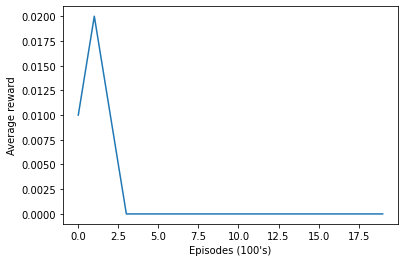

In [112]:
# plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values) / len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i : i+100]))

plt.plot(avg_rewards)
plt.ylabel('Average reward')
plt.xlabel('Episodes (100\'s)')
plt.show()